**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Karen Lizette Rodríguez Hernández
*   MATRÍCULA: A01197734

*   NOMBRE: Marcelo Ismael López Verdugo
*   MATRÍCULA: A00959089

*   NOMBRE: Angel García Ortega
*   MATRÍCULA: A01796653

*   NOMBRE: Juan Carlos Garcés Carrillo
*   MATRÍCULA: A01796283

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/Semana7"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
cereals_df.describe(include=np.number)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
cereals_df.describe(include=object)

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

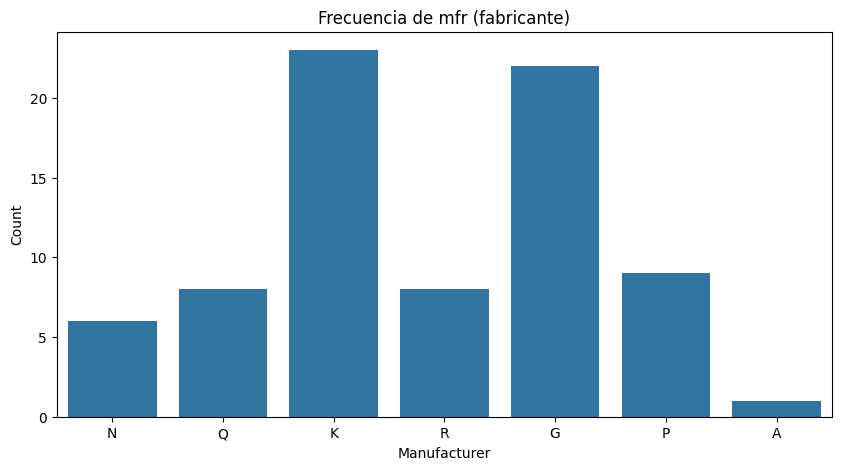

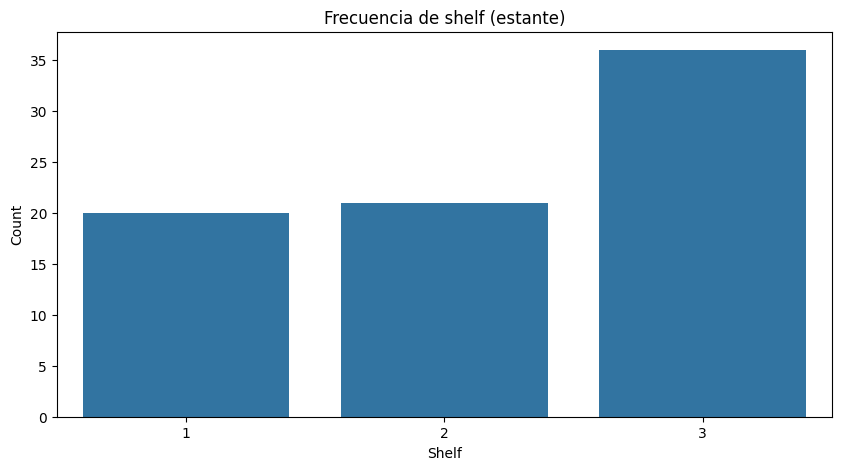

In [ ]:
# Frecuencia de mfr
plt.figure(figsize=(10, 5))
sns.countplot(x='mfr', data=cereals_df)
plt.title('Frecuencia de mfr (fabricante)')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

# Frecuencia de shelf
plt.figure(figsize=(10, 5))
sns.countplot(x='shelf', data=cereals_df)
plt.title('Frecuencia de shelf (estante)')
plt.xlabel('Shelf')
plt.ylabel('Count')
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [ ]:
cross_tab = pd.crosstab(cereals_df['mfr'], cereals_df['shelf'])
cross_tab

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [ ]:
#Obtenemos el mínimo y el máximo para saber los extremos del rango
rating_min = cereals_df['rating'].min()
rating_max = cereals_df['rating'].max()
rating_range = rating_max - rating_min
print(f"El maximo de la variable 'rating' es: {rating_max}")
print(f"El minimo de la variable 'rating' es: {rating_min}")

El maximo de la variable 'rating' es: 93.704912
El minimo de la variable 'rating' es: 18.042851


rating_range
20-40     35
40-60     32
60-80      7
0-20       2
80-100     1
Name: count, dtype: int64

El rango más frecuente de la variable 'rating' es: 20-40


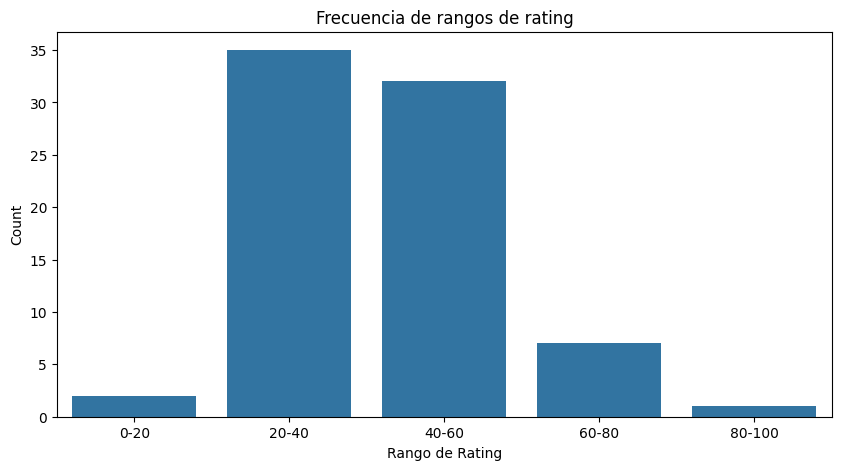

In [ ]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
cereals_df['rating_range'] = pd.cut(cereals_df['rating'], bins=bins, labels=labels, right=False)


# Calculamos la frecuencia de cada rango.
rating_range_counts = cereals_df['rating_range'].value_counts()
print(rating_range_counts)


# Rango más frecuente:
most_frequent_rating_range = rating_range_counts.index[0]
print(f"\nEl rango más frecuente de la variable 'rating' es: {most_frequent_rating_range}")

# Visualización:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating_range', data=cereals_df)
plt.title('Frecuencia de rangos de rating')
plt.xlabel('Rango de Rating')
plt.ylabel('Count')
plt.show()

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [ ]:
top_10_cereals = cereals_df.nlargest(10, 'rating').loc[:, ['name', 'mfr', 'rating']]
top_10_cereals

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

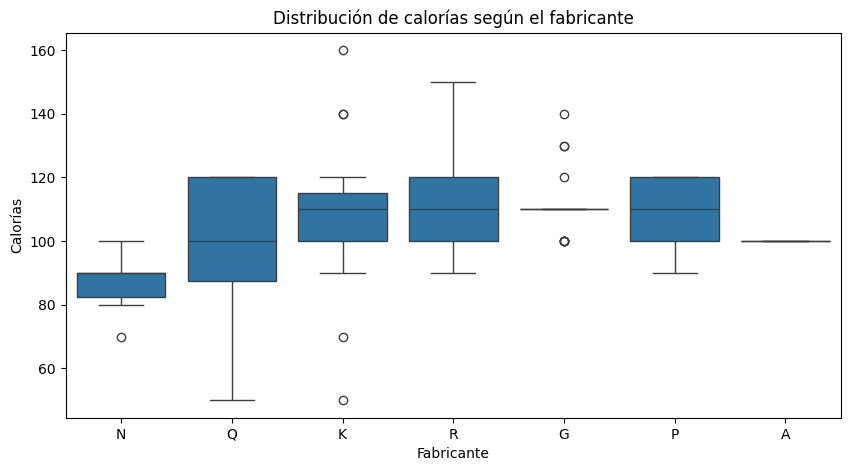

In [ ]:
calories= cereals_df.loc[:, ['calories', 'mfr']]
calories

plt.figure(figsize=(10, 5))
sns.boxplot(x='mfr', y='calories', data=calories)
plt.title('Distribución de calorías según el fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [ ]:
numerica_df = cereals_df.select_dtypes(include=[np.number])
numerica_df

correlation_matrix = numerica_df.corr(method='pearson')
correlation_matrix
#

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


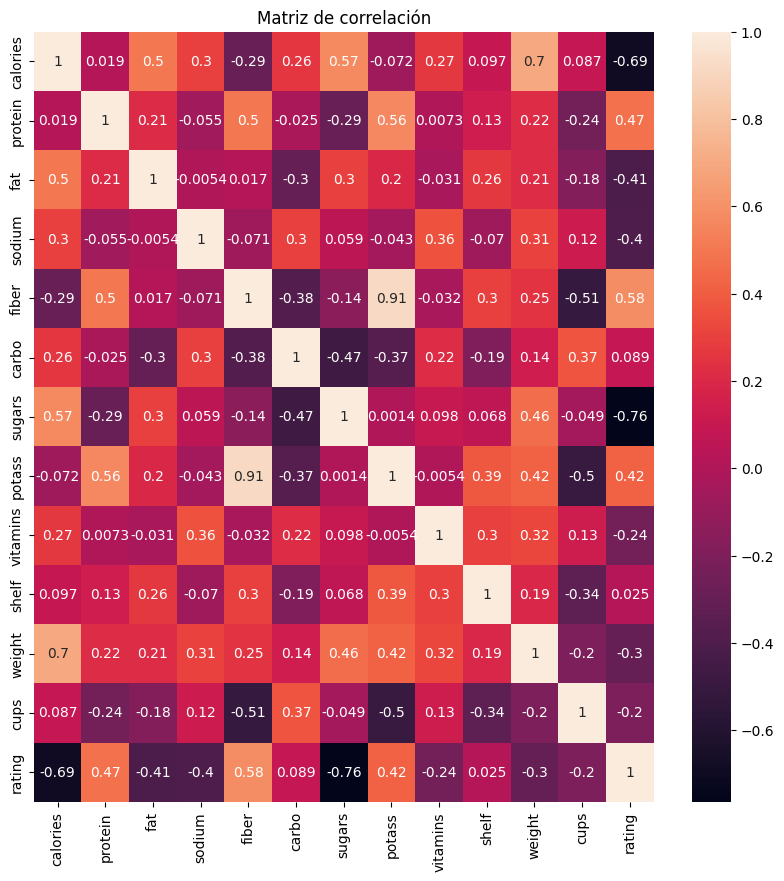

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

Podemos ver las variables con mayor correlación con Rating son, con una fuerte correlación negativa, sugars (-0.76) y calories (-0.68), aunque fiber (0.58) y  protein (0.47) tienen una correlació positiva moderadamente fuerte

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_range
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,60-80
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,20-40
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,40-60
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,80-100
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,20-40
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,20-40
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,40-60
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,40-60


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
from sklearn.preprocessing import StandardScaler

x = cereals_df.drop(columns=['rating','shelf'])
y = cereals_df['rating']
x=x.select_dtypes(include=[np.number])

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
scaled_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,-0.202203,-2.099895
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,-0.202203,0.761919
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,-0.202203,-2.099895
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,-0.202203,-1.373763
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-0.202203,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,-0.202203,-0.305922
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.202203,0.761919
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-0.202203,-0.647631
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-0.202203,0.761919


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected

,0,1,2,3,4,5,6,7,8,9,10
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0.059205,-0.026325,-0.250917,0.021692
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,-1.228817,0.594837,-0.042521,-0.096381
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0.017511,-0.116766,0.493001,-0.031211
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,-1.003853,-0.063792,-0.720550,0.101563
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,0.033091,0.183945,-0.169367,-0.050918
...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,0.260808,1.160446,0.531351,-1.053122,0.817503,-0.665223,-0.280993,-0.054940,0.344181,0.089951
70,-1.634842,0.417530,-1.672206,-0.593553,0.134293,-0.082682,0.257906,-0.161360,0.099496,-0.099663,0.098120
71,0.389697,-0.475626,1.182007,0.334499,-0.494861,0.820825,-0.328101,0.005608,-0.045088,0.031525,0.078019
72,-0.172304,-0.491070,1.163945,0.580625,0.146570,0.290806,0.627485,-0.334248,0.067364,-0.084460,0.047027


In [ ]:

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Porcentaje de varianza explicada por cada componente:")
print(explained_variance_ratio)
print("\nPorcentaje de varianza acumulada:")
print(cumulative_variance_ratio)

Porcentaje de varianza explicada por cada componente:
[0.28018344 0.23955104 0.16236596 0.08990788 0.06557569 0.06102895
 0.05347863 0.0325519  0.00845172 0.00524605 0.00165875]

Porcentaje de varianza acumulada:
[0.28018344 0.51973448 0.68210045 0.77200833 0.83758401 0.89861296
 0.95209159 0.98464348 0.99309521 0.99834125 1.        ]


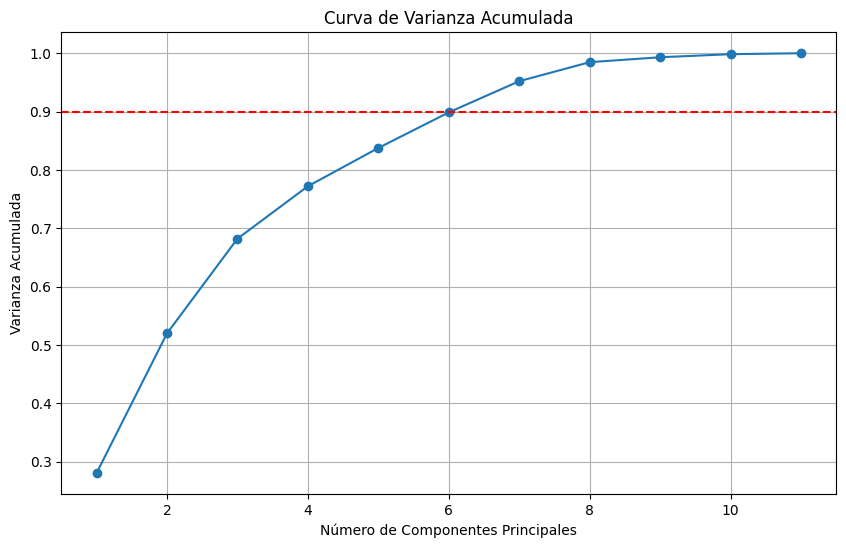

Número mínimo de componentes principales para explicar mas del 90% de la varianza: 7

Información de los componentes principales:


,Componente,Varianza Explicada,Varianza Explicada Acumulada
0,1,0.280183,0.280183
1,2,0.239551,0.519734
2,3,0.162366,0.682100
3,4,0.089908,0.772008
4,5,0.065576,0.837584
5,6,0.061029,0.898613
6,7,0.053479,0.952092
7,8,0.032552,0.984643


In [ ]:
from sklearn.decomposition import PCA

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Curva de Varianza Acumulada')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.grid(True)
plt.show()

n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90)+1
print(f"Número mínimo de componentes principales para explicar mas del 90% de la varianza: {n_components_90}")

pca_90 = PCA(n_components=n_components_90 + 1)
pca_90.fit(scaled_df)


components_info = pd.DataFrame({
    'Componente': range(1, n_components_90 + 2),
    'Varianza Explicada': pca_90.explained_variance_ratio_,
    'Varianza Explicada Acumulada': np.cumsum(pca_90.explained_variance_ratio_)
})
print("\nInformación de los componentes principales:")
components_info


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [ ]:
first_components=np.abs(pca_90.components_[0])
top_3_indices = first_components.argsort()[-3:][::-1]
top_3_variables = x.columns[top_3_indices]
print("Las tres variables más importantes en el primer componente son:")
print(top_3_variables)

Las tres variables más importantes en el primer componente son:
Index(['potass', 'fiber', 'cups'], dtype='object')


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [ ]:
#revisemos las frecuencias de las variables categóricas
cereals_df.describe(include=object)

,name,mfr,type
count,74,74,74
unique,74,7,2
top,100%_Bran,K,C
freq,1,23,73


In [ ]:
cereals_df['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


Como podemos observar la variable name tiene todos los registros diferentes, la variable type solo tiene 2 varoles pero solo 1 de ellos son H, por lo tanto la única variable categórica con la suficiente variabilidad para ser predictor sería mfr

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = pd.DataFrame(encoder.fit_transform(cereals_df[['mfr', 'type']]))
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Se eligió la codificación one-hot porque 'mfr' es una variable categórica nominal, es decir, no hay un orden o clasificación inherente entre las categorías. La codificación one-hot crea nuevas columnas binarias para cada categoría única en esta columna, evitando la introducción de relaciones ordinales donde no existen

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
df_final = pd.concat([scaled_df.iloc[:, :6], onehot_df, cereals_df['shelf'], y], axis=1)
df_final

,calories,protein,fat,sodium,fiber,carbo,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,shelf,rating
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,68.402973
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,33.983679
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,59.425505
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,93.704912
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,39.106174
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,27.753301
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,49.787445
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,51.592193


In [ ]:
df_final.to_csv('cereals_pca.csv', index=False)